<a href="https://colab.research.google.com/github/Sakib3602/ML/blob/main/Logistic_Regrassion_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer, StandardScaler ,OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: xlabel='age', ylabel='Count'>

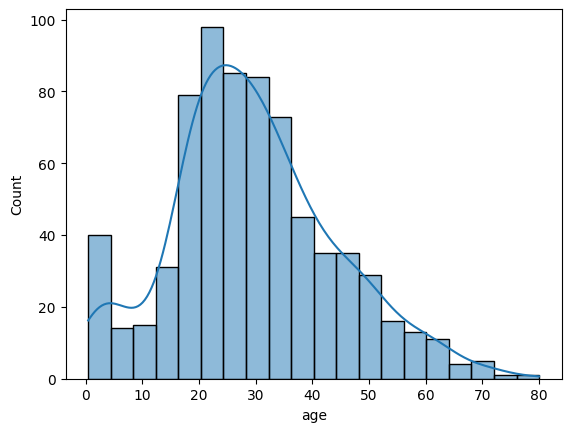

In [ ]:
sns.histplot(df["age"], bins=20, kde=True)

In [ ]:
df['age'] = df['age'].fillna(df['age'].median())
df['age'].isna().sum()

np.int64(0)

In [ ]:
df.drop('deck', axis=1, inplace=True)
df.drop('alive', axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [ ]:
df['embarked'].nunique()

3

<Axes: xlabel='embarked', ylabel='count'>

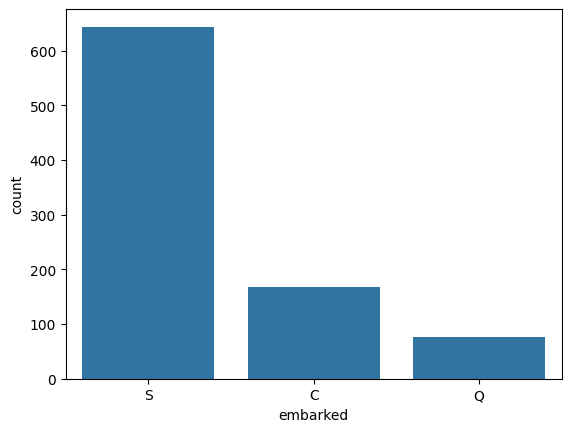

In [ ]:
sns.countplot(x='embarked', data=df)

In [ ]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


<Axes: xlabel='survived', ylabel='age'>

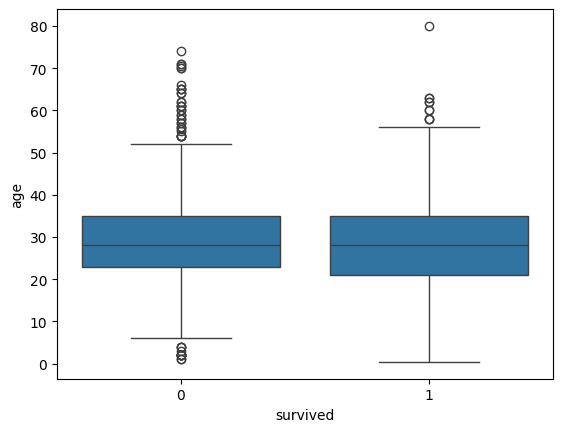

In [ ]:
sns.boxplot(x='survived', y='age', data=df)

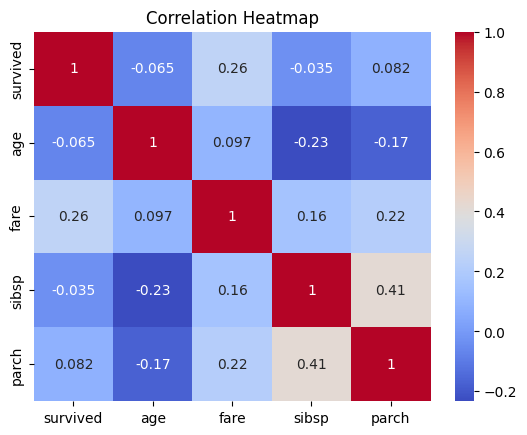

In [ ]:
sns.heatmap(
    df[['survived', 'age', 'fare', 'sibsp', 'parch']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone'],
      dtype='object')

In [ ]:
num_cols = df.drop(columns='survived').select_dtypes(include=['number','float']).columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols , num_cols

(Index(['sex', 'embarked', 'who', 'embark_town'], dtype='object'),
 Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object'))

In [ ]:
log_pipe = Pipeline([
    ("log_x", FunctionTransformer(np.log1p)),
    ('scale', StandardScaler())
])
log_pipe

Pipeline(steps=[('log_x', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('scale', StandardScaler())])

In [ ]:
cat_work = Pipeline([
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
prepocessor = ColumnTransformer(
    transformers=[
        ('num', log_pipe, num_cols),
        ('cat', cat_work, cat_cols)
    ]
)
prepocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('log_x',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scale', StandardScaler())]),
                                 Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['sex', 'embarked', 'who', 'embark_town'], dtype='object'))])

In [ ]:
X = df.drop(columns="survived")
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
445,1,male,4.0,0,2,81.8583,S,First,child,False,Southampton,False
650,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,True
172,3,female,1.0,1,1,11.1333,S,Third,child,False,Southampton,False
450,2,male,36.0,1,2,27.7500,S,Second,man,True,Southampton,False
314,2,male,43.0,1,1,26.2500,S,Second,man,True,Southampton,False
...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S,Third,woman,False,Southampton,True
270,1,male,28.0,0,0,31.0000,S,First,man,True,Southampton,True
860,3,male,41.0,2,0,14.1083,S,Third,man,True,Southampton,False
435,1,female,14.0,1,2,120.0000,S,First,child,False,Southampton,False


In [ ]:
model = Pipeline([
    ("prep", prepocessor),
    ('lr', LogisticRegression())
])
model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log_x',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'embarked', 'who', 'embark_town'], dtype='object'))])),
                ('lr', LogisticRegression())])

In [ ]:
pred_t = model.fit(X_train, y_train)
pred_t

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('log_x',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'embarked', 'who', 'embark_town'], dtype='object'))])),
                ('lr', LogisticRegression())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}")

Accuracy:  0.81
Precision: 0.79
Recall:    0.75
F1 Score:  0.77


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       157
           1       0.79      0.75      0.77       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
new_passenger = pd.DataFrame({
    'pclass': [1],
    'sex': ['male'],
    'age': [28],
    'sibsp': [0],
    'parch': [0],
    'fare': [100.0],
    'embarked': ['S'],
    'who': ['woman'],
    'adult_male': [False],
    'deck': ['C'],
    'embark_town': ['Southampton'],
    'alone': [True]
})

prediction = model.predict(new_passenger)

if prediction[0] == 1:
    print("Passenger Survived! 🎉")
else:
    print("Passenger did not survive. 😔")

Passenger Survived! 🎉


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  22],
       [ 28,  83]])

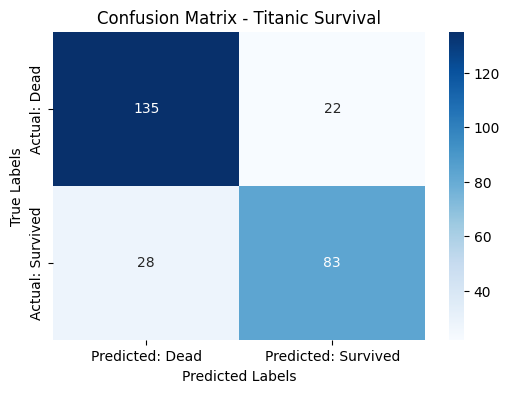

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Dead', 'Predicted: Survived'],
            yticklabels=['Actual: Dead', 'Actual: Survived'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Titanic Survival')
plt.show()

In [ ]:
y_test_pred_prob = model.predict_proba(X_test)[:,1]

y_test_pred_prob

array([0.06850712, 0.15815658, 0.10140582, 0.8295284 , 0.62600928,
       0.95006552, 0.71378699, 0.05573179, 0.77230742, 0.90574519,
       0.26715421, 0.0680578 , 0.34956577, 0.13544151, 0.15393986,
       0.93530712, 0.25294853, 0.71426943, 0.1760215 , 0.36858219,
       0.09254429, 0.37098595, 0.56928572, 0.1047013 , 0.09771933,
       0.21024613, 0.49138   , 0.16514572, 0.29537314, 0.64999347,
       0.10391465, 0.69127095, 0.54754472, 0.66072522, 0.10712755,
       0.09618022, 0.41436684, 0.71378699, 0.96084189, 0.08561264,
       0.12627757, 0.04630963, 0.08596606, 0.10607297, 0.68297   ,
       0.04589983, 0.10462685, 0.0977096 , 0.09036766, 0.38787704,
       0.61188825, 0.83597379, 0.02387181, 0.77987659, 0.06881528,
       0.92933291, 0.15581167, 0.95642314, 0.81390841, 0.75614277,
       0.09859512, 0.74087005, 0.73944808, 0.39514853, 0.10607297,
       0.7370883 , 0.27561396, 0.08404949, 0.07491253, 0.92542985,
       0.6730282 , 0.92361774, 0.55628118, 0.91164819, 0.09443

In [ ]:
thresholds = np.linspace(0.1, 0.9, 9)
rows = []

for th in thresholds:

    y_pred_th = (y_test_pred_prob >= th).astype(int)


    acc = accuracy_score(y_test, y_pred_th)
    prec = precision_score(y_test, y_pred_th)
    rec = recall_score(y_test, y_pred_th)
    f1 = f1_score(y_test, y_pred_th)


    rows.append({
        'Threshold': th,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

df_metrics = pd.DataFrame(rows)
print(df_metrics)

   Threshold  Accuracy  Precision    Recall  F1 Score
0        0.1  0.615672   0.520000  0.936937  0.668810
1        0.2  0.768657   0.662252  0.900901  0.763359
2        0.3  0.791045   0.700730  0.864865  0.774194
3        0.4  0.813433   0.765217  0.792793  0.778761
4        0.5  0.813433   0.790476  0.747748  0.768519
5        0.6  0.813433   0.827957  0.693694  0.754902
6        0.7  0.805970   0.927536  0.576577  0.711111
7        0.8  0.727612   0.975000  0.351351  0.516556
8        0.9  0.694030   1.000000  0.261261  0.414286
